In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import style
from mpl_toolkits.mplot3d import Axes3D
style.use('seaborn-whitegrid')

In [2]:
def matrix_print(m):
    length = len(m)
    for _ in range (length):
        print (m[_])
        
def ComputeCost(theta):
    m = ex1data.shape[0]  # finding the number of trial examples
    n = ex1data.shape[1]  # finding the number of features + 1
    cost = 0
    for row in range(m): # iterating over each training example
        hypothesis = 0  
        for val in range(n-1):  # iterating over each feature
            hypothesis += ex1data.values[row][val] * theta[val][0]  
            # multiplying each feature with its corresponding theta value
        cost_temp = (hypothesis - ex1data.values[row][n-1])**2
        cost += cost_temp
    cost = (cost*0.5)/m
    return round(cost,2)

def gradientDescent(theta, alpha, iterations):
    m = ex1data.shape[0]  # finding the number of trial examples
    n = ex1data.shape[1]  # finding the number of features + 1
    for iteration in range(iterations):
        total0 = 0
        total1 = 0
        for row in range(m): # iterating over each training example
            hypothesis = 0
            for val in range(n-1):
                hypothesis += ex1data.values[row][val] * theta[val][0]  
            load = hypothesis - ex1data.values[row][n-1]
            total0 += load*ex1data.values[row][0]
            total1 += load*ex1data.values[row][1]
        temp0 = theta[0][0] - ((alpha*total0)/m)
        temp1 = theta[1][0] - ((alpha*total1)/m)
        theta = [[round(temp0, 4)], [round(temp1, 4)]]
    return theta

In [535]:
# window for testing functions

(array([-5.,  0.,  5., 10., 15., 20., 25., 30.]),
 <a list of 8 Text yticklabel objects>)

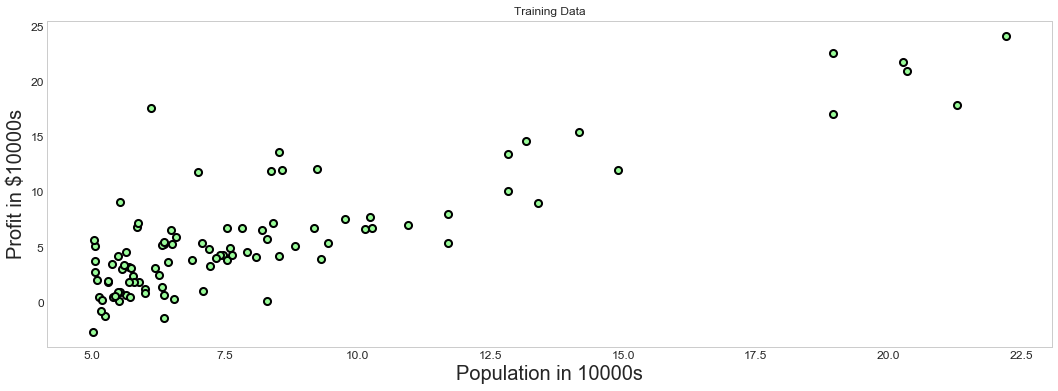

In [3]:
ex1data = pd.read_csv("/Users/mehuljangir/Downloads/machine-learning-ex/ex1/ex1data1.txt", 
                      names=['Population', 'Profit'])  # loading the data into memory

plt.figure(figsize = (18, 6)) #setting the figure size

# making a scatter plot to display and judge data before performing linear regression
plt.scatter(ex1data['Population'], ex1data['Profit'],
            edgecolor='black',
            s=50,   # style elements
            linewidth=2,
            color='palegreen'
)
plt.grid(False)
plt.xlabel('Population in 10000s',fontsize=20)
plt.ylabel('Profit in $10000s', fontsize=20)
plt.title('Training Data')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

In [4]:
m = ex1data.shape[0]
print ('No. of training examples --> {}'.format(m)) # outputting the number of traning examples for the user
eye = []
for i in range(0,m): 
    eye.append(1)  # creating an array of 1s and adding it to X
if len(ex1data.columns) == 2:  # to avoid an error wherein ex1data already has the column of 1s
    ex1data.insert(0, "feature1", eye)
print ('here is theta (initial)')
theta = [[0, 0]]
matrix_print(theta)

No. of training examples --> 97
here is theta (initial)


NameError: name 'theta' is not defined

In [538]:
# gradient descent settings
alpha = 0.01
iterations = 1500
# note - too low a value of alpha results in gradient descent taking too long a time to converge
# note - too high a value of alpha results in gradient descent failing to converge

In [539]:
#theta = [[0],[0]]  # theta values (initial), or for testing
#theta = gradientDescent(theta, 0.01, 1500)    # commented out becuase takes a lot of time to execute
print ('expected profit for 35k people: {}'.format(((theta[0][0])+(theta[1][0]*3.5))*10000))
print ('expected profit for 70k people: {}'.format(((theta[0][0])+(theta[1][0]*7))*10000))
print (theta)

expected profit for 35k people: 4525.499999999995
expected profit for 70k people: 45345.99999999999
[[-3.6295], [1.1663]]


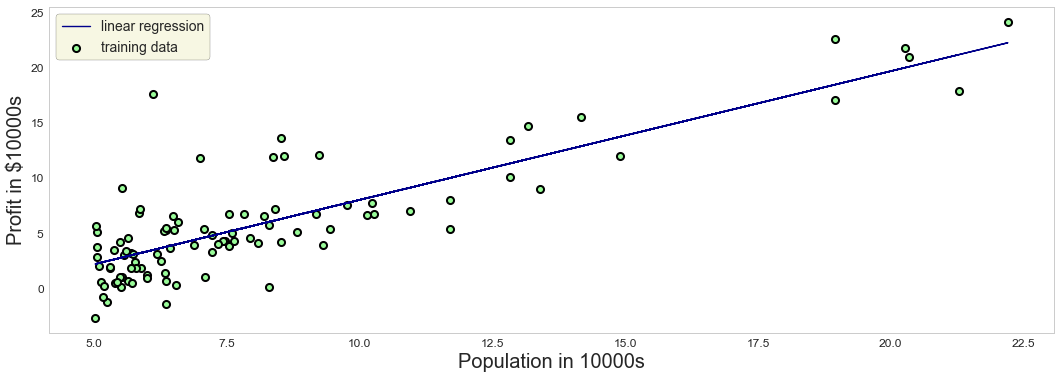

In [540]:
plt.figure(figsize = (18, 6)) #setting the figure size
# making a scatter plot to display and judge data before performing linear regression
plt.scatter(ex1data['Population'], ex1data['Profit'],
            edgecolor='black',
            s=50,   # style elements
            linewidth=2,
            color='palegreen',
            label = 'training data'
)
plt.grid(False)
plt.xlabel('Population in 10000s',fontsize=20)
plt.ylabel('Profit in $10000s', fontsize=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

linear_y_axis = []
for row in range(ex1data.shape[0]):
    linear_y_axis.append(ex1data.Population.values[row] * theta[1][0] + theta[0][0])
    
plt.plot(ex1data.Population.values, linear_y_axis, label='linear regression',color='darkblue')
plt.legend(fontsize=14, frameon=True,facecolor='beige',edgecolor='black')


In [566]:
theta_zero_vals = np.linspace(-10,10, 100)
theta_one_vals = np.linspace(-1,4, 100)
J_vals = np.zeros((theta_zero_vals.shape[0], theta_one_vals.shape[0]))

for i in range(theta_zero_vals.shape[0]):
    for j in range(theta_one_vals.shape[0]):
        t = [[theta_zero_vals[i]], [theta_one_vals[j]]]
        J_vals[i][j] = ComputeCost(t)

Jt_vals = np.transpose(J_vals)

In [568]:
theta_zero_vals, theta_one_vals = np.meshgrid(theta_zero_vals, theta_one_vals)
# do not execute more than once, gives memory error 

(-1, 4)

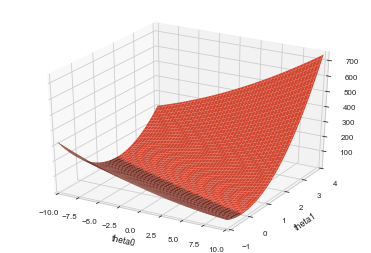

In [569]:
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(theta_zero_vals, theta_one_vals, Jt_vals)
plt.xlabel('theta0')
plt.ylabel('theta1')
plt.xlim(-10,10)
plt.ylim(-1,4)

Text(0.5, 1.0, 'Contour plot for gradient descent')

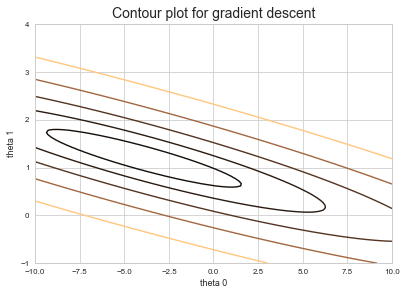

In [582]:
# making contour plot for gradient descent

fig, ax = plt.subplots()
ax.contour(theta_zero_vals, theta_one_vals, Jt_vals, np.geomspace(0.01, 100, 15), cmap='copper')
plt.xlabel('theta 0')
plt.ylabel('theta 1')
plt.title('Contour plot for gradient descent', fontsize=14)